In [115]:
import pandas as pd
import numpy as np
import os
from statistics import mean
# Machine Learning Libraries
from sklearn.ensemble import RandomForestClassifier
# Randomized Search of Hyperparameters
from scipy.stats import randint
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV

# Analysis of accuracy
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
# Export the tree
from sklearn.tree import export_graphviz
# Convert to png using system command
from subprocess import call

# Feature Importance
from sklearn.inspection import permutation_importance

# Import and image to jupyter notebook
from IPython.display import Image
import time
#Work with plots
import matplotlib.pyplot as plt

# Training and testing sampling
# to ensure sam proportion of samples
# in trainign and testing compared
# with the whole dataset proportion
from sklearn.model_selection import train_test_split
from collections import Counter

# Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# Scale Data
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [116]:
#Data
dirname = os.getcwd()
train_csv = os.path.join(dirname, "training.csv")
missing_values = ["n/a", "na", "--"]
train = pd.read_csv(train_csv, na_values = missing_values)
testing_csv = os.path.join(dirname, "testing.csv")
test = pd.read_csv(testing_csv, na_values = missing_values)
print (train.iloc[:, [1,2]])

     BrdIndx  Area
0       1.27    91
1       2.36   241
2       2.12   266
3       2.42   399
4       2.15   944
..       ...   ...
163     1.43    39
164     1.92   141
165     2.97   252
166     1.57   216
167     2.12   836

[168 rows x 2 columns]


In [117]:
print("Rows and Columns(Train): ",train.shape)
print("Rows and Columns(Test) : ",test.shape)

Rows and Columns(Train):  (168, 148)
Rows and Columns(Test) :  (507, 148)


In [118]:
# check for missing values although it is clear there are none
train.isnull().any().any()

False

In [119]:
# duplicated function of pandas returns a duplicate row as true and others as false
sum(train.duplicated())

0

In [120]:
train.columns

Index(['class', 'BrdIndx', 'Area', 'Round', 'Bright', 'Compact', 'ShpIndx',
       'Mean_G', 'Mean_R', 'Mean_NIR',
       ...
       'SD_NIR_140', 'LW_140', 'GLCM1_140', 'Rect_140', 'GLCM2_140',
       'Dens_140', 'Assym_140', 'NDVI_140', 'BordLngth_140', 'GLCM3_140'],
      dtype='object', length=148)

In [121]:
test.columns

Index(['class', 'BrdIndx', 'Area', 'Round', 'Bright', 'Compact', 'ShpIndx',
       'Mean_G', 'Mean_R', 'Mean_NIR',
       ...
       'SD_NIR_140', 'LW_140', 'GLCM1_140', 'Rect_140', 'GLCM2_140',
       'Dens_140', 'Assym_140', 'NDVI_140', 'BordLngth_140', 'GLCM3_140'],
      dtype='object', length=148)

In [122]:
# Target variable
Y_train = train["class"].copy()
Y_test  = test["class"].copy()

In [123]:
Y_train.value_counts()

grass        29
building     25
concrete     23
tree         17
shadow       16
car          15
pool         15
asphalt      14
soil         14
Name: class, dtype: int64

Y_test.value_counts()

Feature Set 1: Columns 1 to 21 (No Scale)

Feature Set 2: Columns 22 to 42 (Scale: 40)

Feature Set 3: Columns 43 to 63 (Scale: 60)

Feature Set 4: Columns 64 to 84 (Scale: 80)

Feature Set 5: Columns 85 to 105 (Scale: 100)

Feature Set 6: Columns 106 to 126 (Scale: 120)

Feature Set 7: Columns 127 to 147 (Scale: 140)

In [124]:
train.columns[0]

'class'

In [125]:
#for i in range(7):
#    origin = 20*i + i + 1
#    destination = 20*i + i + 22
#    print(range(origin,destination))
#    for n in range(origin,destination):
#        print(n)
#        print(train.columns[n])

In [126]:
for i in range(7):
    origin = 20*i + i + 1
    destination = 20*i + i + 22
    #print(range(origin,destination))
    #for n in range(origin,destination):
    #    print(n)
    #    print(train.columns[n])
    X_train = train.iloc[:,range(origin,destination)]
    X_test  = test.iloc[:,range(origin,destination)]
    print(X_train.columns)
    print(X_test.columns)

Index(['BrdIndx', 'Area', 'Round', 'Bright', 'Compact', 'ShpIndx', 'Mean_G',
       'Mean_R', 'Mean_NIR', 'SD_G', 'SD_R', 'SD_NIR', 'LW', 'GLCM1', 'Rect',
       'GLCM2', 'Dens', 'Assym', 'NDVI', 'BordLngth', 'GLCM3'],
      dtype='object')
Index(['BrdIndx', 'Area', 'Round', 'Bright', 'Compact', 'ShpIndx', 'Mean_G',
       'Mean_R', 'Mean_NIR', 'SD_G', 'SD_R', 'SD_NIR', 'LW', 'GLCM1', 'Rect',
       'GLCM2', 'Dens', 'Assym', 'NDVI', 'BordLngth', 'GLCM3'],
      dtype='object')
Index(['BrdIndx_40', 'Area_40', 'Round_40', 'Bright_40', 'Compact_40',
       'ShpIndx_40', 'Mean_G_40', 'Mean_R_40', 'Mean_NIR_40', 'SD_G_40',
       'SD_R_40', 'SD_NIR_40', 'LW_40', 'GLCM1_40', 'Rect_40', 'GLCM2_40',
       'Dens_40', 'Assym_40', 'NDVI_40', 'BordLngth_40', 'GLCM3_40'],
      dtype='object')
Index(['BrdIndx_40', 'Area_40', 'Round_40', 'Bright_40', 'Compact_40',
       'ShpIndx_40', 'Mean_G_40', 'Mean_R_40', 'Mean_NIR_40', 'SD_G_40',
       'SD_R_40', 'SD_NIR_40', 'LW_40', 'GLCM1_40', 'Rect_40', 

In [127]:
#Define the model and datasets for training and testing (all features)
X_train = train.iloc[:,1:148]
X_test  = test.iloc[:,1:148]
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((168, 147), (168,), (507, 147), (507,))

In [128]:
#Run Random Forest grid search with all features
#No scaling
param_dist = {
    "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, None],
    #"max_features": randint(1, 15),
    "max_features": list(range(1,25,1)),  # sqrt(147)
    "max_samples": [x / 10 for x in list(range(1,30,1))],
    "min_samples_split": list(range(2,11,1)),
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"],
    "n_estimators": [5, 10, 50, 100,500, 1000] # As long as possible
}

#Random Search of Best Parameters
rng = np.random.RandomState(0)
clf = RandomForestClassifier(random_state = rng)
rsh = HalvingRandomSearchCV(
    estimator=clf, param_distributions=param_dist, factor=2, random_state=rng
)

# Fit the model
rsh.fit(X_train, Y_train)

#Display the best parameters
pars = str(rsh.best_params_)
pars = pars.replace(",", ",\n")

#Get the classifier with the best parameters
clf_best = rsh.best_estimator_
Y_hat = clf_best.predict(X_test)

# mean accuracy test dataset
the_accuracy1 = clf_best.score(X_test, Y_test)
the_accuracy2 = accuracy_score(Y_hat, Y_test)
#Classification Error (Testing Error Rate)
the_error = np.mean(Y_hat != Y_test)

#Evaluate the model with cross-validation (best model of random search)
#repeated stratitied k-fold with
#three repeats and 5 folds
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(clf_best, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
#print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
the_mean_accuracy = np.mean(n_scores)
the_std_accuracy = np.std(n_scores)


In [129]:
#Best Parameters
#No scaling (All Features)
pars

"{'n_estimators': 1000,\n 'min_samples_split': 4,\n 'max_samples': 0.7,\n 'max_features': 4,\n 'max_depth': 9,\n 'criterion': 'gini',\n 'bootstrap': True}"

In [130]:
# Accuracy and error
#No scaling (All Features)
print("Accuracy1: %s. Accuracy2: %s. CV mean accuracy: %s. CV std accuracy: %s. Error: %s" % (the_accuracy1, the_accuracy2, the_mean_accuracy, the_std_accuracy, the_error))

Accuracy1: 0.8205128205128205. Accuracy2: 0.8205128205128205. CV mean accuracy: 0.8472370766488414. CV std accuracy: 0.032387501203838244. Error: 0.1794871794871795


In [131]:
# Accuracy
#No scaling (All Features)
the_accuracy_ns = the_accuracy1

In [132]:
#Scale the data
#All Features
scaler = StandardScaler() #standardize data values into standard format
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [133]:
#Run Random Forest grid search with all features
#Standard Scaling
param_dist = {
    "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, None],
    #"max_features": randint(1, 15),
    "max_features": list(range(1,25,1)),  # sqrt(147)
    "max_samples": [x / 10 for x in list(range(1,30,1))],
    "min_samples_split": list(range(2,11,1)),
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"],
    "n_estimators": [5, 10, 50, 100,500, 1000] # As long as possible
}

#Random Search of Best Parameters
rng = np.random.RandomState(0)
clf = RandomForestClassifier(random_state = rng)
rsh = HalvingRandomSearchCV(
    estimator=clf, param_distributions=param_dist, factor=2, random_state=rng
)

# Fit the model
rsh.fit(X_train_std, Y_train)

#Display the best parameters
pars = str(rsh.best_params_)
pars = pars.replace(",", ",\n")

#Get the classifier with the best parameters
clf_best = rsh.best_estimator_
Y_hat = clf_best.predict(X_test_std)

# mean accuracy test dataset
the_accuracy1 = clf_best.score(X_test_std, Y_test)
the_accuracy2 = accuracy_score(Y_hat, Y_test)
#Classification Error (Testing Error Rate)
the_error = np.mean(Y_hat != Y_test)

#Evaluate the model with cross-validation (best model of random search)
#repeated stratitied k-fold with
#three repeats and 5 folds
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(clf_best, X_train_std, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
#print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
the_mean_accuracy = np.mean(n_scores)
the_std_accuracy = np.std(n_scores)

In [134]:
#Best Parameters
#Scale the data (All Features)
pars

"{'n_estimators': 1000,\n 'min_samples_split': 4,\n 'max_samples': 0.7,\n 'max_features': 4,\n 'max_depth': 9,\n 'criterion': 'gini',\n 'bootstrap': True}"

In [135]:
# Accuracy and error
#Scale the data (All Features)
print("Accuracy1: %s. Accuracy2: %s. CV mean accuracy: %s. CV std accuracy: %s. Error: %s" % (the_accuracy1, the_accuracy2, the_mean_accuracy, the_std_accuracy, the_error))

Accuracy1: 0.8224852071005917. Accuracy2: 0.8224852071005917. CV mean accuracy: 0.8452168746286394. CV std accuracy: 0.03318200956384219. Error: 0.17751479289940827


In [136]:
# Accuracy
# Scaling (All Features)
the_accuracy_s = the_accuracy1

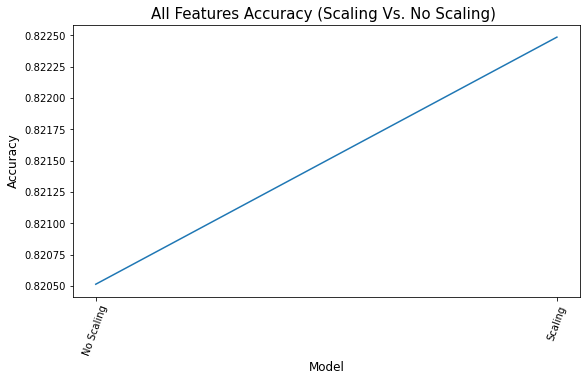

In [137]:
#Plot results All Features (Scaled vs Not Scaled Accuracy)
fig = plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot([0, 1], [the_accuracy_ns, the_accuracy_s]); plt.xticks([0, 1], ["No Scaling", "Scaling"])
plt.title("All Features Accuracy (Scaling Vs. No Scaling) ",fontsize = 15)
plt.xlabel('Model',fontsize = 12)
plt.xticks(rotation = 70)
plt.ylabel('Accuracy',fontsize = 12)
plt.show()

In [138]:
# No Scaling the Data
# This is RF for each Feature Set
# dictionary to save results
rf_results_model1 = {'index' : [], 'scale' : [], 
                     'accuracy' : [], 'error' : [],
                     'cv_mean' : [], 'cv_std' : []}
rf_results_model2 = {'index' : [], 'clf_best' : [], 'X_train' : [],'Y_train' : [],
                     'X_test' : [], 'Y_test' : []}
#Random Forest Classifier
for i in range(7):
    origin = 20*i + i + 1
    destination = 20*i + i + 22
    X_train = train.iloc[:,range(origin,destination)]
    X_test  = test.iloc[:,range(origin,destination)]
    the_scale = 20 * i + 20
    #if i == 0:
    #    the_scale = "NA"
    param_dist = {
        "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, None],
        #"max_features": randint(1, 15),
        "max_features": list(range(1,15,1)),  # sqrt(147)
        "max_samples": [x / 10 for x in list(range(1,30,1))],
        "min_samples_split": list(range(2,11,1)),
        #"bootstrap": [True, False],
        "criterion": ["gini", "entropy"],
        "n_estimators": [5, 10, 50, 100, 500, 1000] # As long as possible
    }

    #Random Search of Best Parameters
    rng = np.random.RandomState(0)
    clf = RandomForestClassifier(random_state = rng)
    rsh = HalvingRandomSearchCV(
        estimator=clf, param_distributions=param_dist, factor=2, random_state=rng
    )

    # Fit the model
    rsh.fit(X_train, Y_train)

    #Display the best parameters
    pars = str(rsh.best_params_)
    pars = pars.replace(",", ",\n")

    #Get the classifier with the best parameters
    clf_best = rsh.best_estimator_
    Y_hat = clf_best.predict(X_test)

    # mean accuracy test dataset
    the_accuracy = clf_best.score(X_test, Y_test)
    #Classification Error (Testing Error Rate)
    the_error = np.mean(Y_hat != Y_test)

    #Evaluate the model with cross-validation (best model of random search)
    #repeated stratitied k-fold with
    #three repeats and 5 folds
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    n_scores = cross_val_score(clf_best, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    # report performance
    #print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
    the_mean_accuracy = np.mean(n_scores)
    the_std_accuracy = np.std(n_scores)
    
    #Save results in dictionary    
    rf_results_model1['index'].append(i)
    rf_results_model1['scale'].append(the_scale)
    #rf_results_model1['clf_best'].append(clf_best)
    #rf_results_model1['X_train'].append(X_train)
    #rf_results_model1['Y_train'].append(Y_train)
    #rf_results_model1['X_test'].append(X_test)
    #rf_results_model1['Y_test'].append(Y_test)
    rf_results_model1['accuracy'].append(the_accuracy)
    rf_results_model1['error'].append(the_error)
    rf_results_model1['cv_mean'].append(the_mean_accuracy)
    rf_results_model1['cv_std'].append(the_std_accuracy)
    #
    rf_results_model2['index'].append(i)
    rf_results_model2['clf_best'].append(clf_best)
    rf_results_model2['X_train'].append(X_train)
    rf_results_model2['Y_train'].append(Y_train)
    rf_results_model2['X_test'].append(X_test)
    rf_results_model2['Y_test'].append(Y_test)
    

In [139]:
# Scaling the data
# This is RF for each Feature Set
# dictionary to save results
rf_results_model3 = {'index' : [], 'scale' : [], 
                     'accuracy' : [], 'error' : [],
                     'cv_mean' : [], 'cv_std' : []}
rf_results_model4 = {'index' : [], 'clf_best' : [], 'X_train' : [],'Y_train' : [],
                     'X_test' : [], 'Y_test' : []}
#Random Forest Classifier
for i in range(7):
    origin = 20*i + i + 1
    destination = 20*i + i + 22
    X_train = train.iloc[:,range(origin,destination)]
    X_test  = test.iloc[:,range(origin,destination)]
    scaler = StandardScaler() #standardize data values into standard format
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)
    the_scale = 20 * i + 20
    #if i == 0:
    #    the_scale = "NA"
    param_dist = {
        "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, None],
        #"max_features": randint(1, 15),
        "max_features": list(range(1,15,1)),  # sqrt(147)
        "max_samples": [x / 10 for x in list(range(1,30,1))],
        "min_samples_split": list(range(2,11,1)),
        #"bootstrap": [True, False],
        "criterion": ["gini", "entropy"],
        "n_estimators": [5, 10, 50, 100, 500, 1000] # As long as possible
    }

    #Random Search of Best Parameters
    rng = np.random.RandomState(0)
    clf = RandomForestClassifier(random_state = rng)
    rsh = HalvingRandomSearchCV(
        estimator=clf, param_distributions=param_dist, factor=2, random_state=rng
    )

    # Fit the model
    rsh.fit(X_train_std, Y_train)

    #Display the best parameters
    pars = str(rsh.best_params_)
    pars = pars.replace(",", ",\n")

    #Get the classifier with the best parameters
    clf_best = rsh.best_estimator_
    Y_hat = clf_best.predict(X_test_std)

    # mean accuracy test dataset
    the_accuracy = clf_best.score(X_test_std, Y_test)
    #Classification Error (Testing Error Rate)
    the_error = np.mean(Y_hat != Y_test)

    #Evaluate the model with cross-validation (best model of random search)
    #repeated stratitied k-fold with
    #three repeats and 5 folds
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    n_scores = cross_val_score(clf_best, X_train_std, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    # report performance
    #print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
    the_mean_accuracy = np.mean(n_scores)
    the_std_accuracy = np.std(n_scores)
    
    #Save results in dictionary    
    rf_results_model3['index'].append(i)
    rf_results_model3['scale'].append(the_scale)
    #rf_results_model3['clf_best'].append(clf_best)
    #rf_results_model3['X_train'].append(X_train_std)
    #rf_results_model3['Y_train'].append(Y_train)
    #rf_results_model3['X_test'].append(X_test_std)
    #rf_results_model3['Y_test'].append(Y_test)
    rf_results_model3['accuracy'].append(the_accuracy)
    rf_results_model3['error'].append(the_error)
    rf_results_model3['cv_mean'].append(the_mean_accuracy)
    rf_results_model3['cv_std'].append(the_std_accuracy)
    #
    rf_results_model4['index'].append(i)
    rf_results_model4['clf_best'].append(clf_best)
    rf_results_model4['X_train'].append(X_train_std)
    rf_results_model4['Y_train'].append(Y_train)
    rf_results_model4['X_test'].append(X_test_std)
    rf_results_model4['Y_test'].append(Y_test)

In [140]:
# print each data item in dic rf_results_model1 (no scaling)
for key, value in rf_results_model1.items():
    #index, scale, accuracy, error, mean, std = value
    #print ("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format(index, scale, accuracy, error, mean, std))
    print(key)
    print(value)

index
[0, 1, 2, 3, 4, 5, 6]
scale
[20, 40, 60, 80, 100, 120, 140]
accuracy
[0.7672583826429981, 0.7928994082840237, 0.7731755424063116, 0.73767258382643, 0.7357001972386588, 0.6962524654832347, 0.6627218934911243]
error
[0.23274161735700197, 0.20710059171597633, 0.22682445759368836, 0.26232741617357, 0.26429980276134124, 0.3037475345167653, 0.33727810650887574]
cv_mean
[0.8272133095662507, 0.8172905525846702, 0.7935828877005348, 0.8272727272727275, 0.776114081996435, 0.7521093285799166, 0.7521093285799166]
cv_std
[0.04936771194652674, 0.056217126556562906, 0.06003435217065299, 0.05897476013523224, 0.038733600308215814, 0.05852556619594855, 0.05852556619594855]


In [141]:
# print each data item in dic rf_results_model1 (scaling)
for key, value in rf_results_model3.items():
    #index, scale, accuracy, error, mean, std = value
    #print ("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format(index, scale, accuracy, error, mean, std))
    print(key)
    print(value)

index
[0, 1, 2, 3, 4, 5, 6]
scale
[20, 40, 60, 80, 100, 120, 140]
accuracy
[0.7672583826429981, 0.7928994082840237, 0.7712031558185405, 0.7416173570019724, 0.73767258382643, 0.6982248520710059, 0.6627218934911243]
error
[0.23274161735700197, 0.20710059171597633, 0.22879684418145957, 0.2583826429980276, 0.26232741617357, 0.30177514792899407, 0.33727810650887574]
cv_mean
[0.8232323232323233, 0.8172905525846702, 0.7935828877005348, 0.8233511586452765, 0.776114081996435, 0.7541295306001188, 0.7541295306001188]
cv_std
[0.05325431067084179, 0.056217126556562906, 0.06301930576234982, 0.05264576448336248, 0.03721493704264538, 0.05815521490905936, 0.05815521490905936]


In [142]:
# plot accuracy for visualization
# Each Feature Set (No Scaling Vs. Scaling)
data = rf_results_model1['accuracy']
labels = rf_results_model1['scale']
data_std = rf_results_model3['accuracy']
labels_std = rf_results_model3['scale']

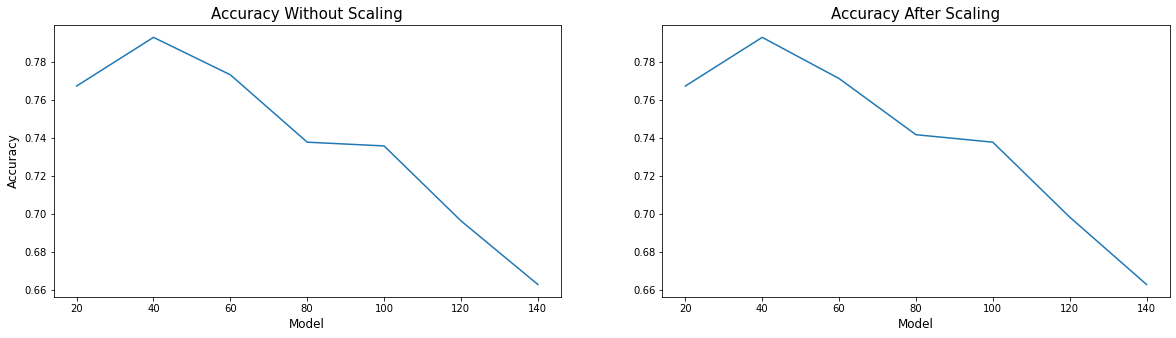

In [143]:
# plot accuracy for visualization
# Each Feature Set (No Scaling Vs. Scaling)
fig = plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot([i for i, e in enumerate(data)], data); plt.xticks([i for i, e in enumerate(labels)], [l for l in labels])
plt.title("Accuracy Without Scaling",fontsize = 15)
plt.xlabel('Model',fontsize = 12)
plt.xticks(rotation = 0)
plt.ylabel('Accuracy',fontsize = 12)
plt.subplot(122)
plt.plot([i for i, e in enumerate(data_std)], data_std); plt.xticks([i for i, e in enumerate(labels_std)], [l for l in labels_std])
plt.title("Accuracy After Scaling",fontsize = 15)
plt.xlabel('Model',fontsize = 12)
plt.xticks(rotation =0)
plt.show()

In [144]:
# print each data item in dic rf_results_model2
#for key, value in rf_results_model2.items():
#    print(key)
#    print(value)

In [145]:
# No Scaled Model (But equal accuracy to scaled)
#Index of the MAX accuracy element in a dictionary
the_index = rf_results_model1['accuracy'].index(max(rf_results_model1['accuracy']))
the_scale = rf_results_model1['scale'][the_index]
the_accuracy = rf_results_model1['accuracy'][the_index]
the_index, the_scale, the_accuracy

(1, 40, 0.7928994082840237)

In [146]:
# From the best model, get feature importance
# No Scaled Model (But equal accuracy to scaled)
clf_best = rf_results_model2['clf_best'][the_index]
X_train = rf_results_model2['X_train'][the_index]
Y_train = rf_results_model2['Y_train'][the_index]
X_test = rf_results_model2['X_test'][the_index]
Y_test = rf_results_model2['Y_test'][the_index]

In [169]:
# Metrics
# No Scaled Model (But equal accuracy to scaled)
Y_hat = clf_best.predict(X_test)
print('Metrics: \n', classification_report(Y_test, Y_hat))

Metrics: 
               precision    recall  f1-score   support

    asphalt        0.91      0.89      0.90        45
   building        0.71      0.73      0.72        97
        car        0.73      0.90      0.81        21
   concrete        0.72      0.68      0.70        93
      grass        0.79      0.88      0.83        83
       pool        1.00      0.86      0.92        14
     shadow        0.86      0.93      0.89        45
       soil        0.62      0.75      0.68        20
       tree        0.92      0.75      0.83        89

    accuracy                           0.79       507
   macro avg       0.81      0.82      0.81       507
weighted avg       0.80      0.79      0.79       507



In [170]:
clf_report = classification_report(Y_test, Y_hat, output_dict=True)

<AxesSubplot:>

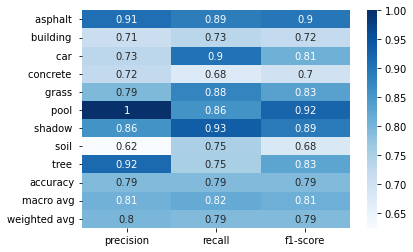

In [176]:
#
import seaborn as sns
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cmap="Blues")

In [148]:
# Extract single tree
estimator = clf_best.estimators_[0]

In [149]:
estimator

DecisionTreeClassifier(max_depth=14, max_features=14, min_samples_split=4,
                       random_state=209652396)

In [150]:
X_train.columns

Index(['BrdIndx_40', 'Area_40', 'Round_40', 'Bright_40', 'Compact_40',
       'ShpIndx_40', 'Mean_G_40', 'Mean_R_40', 'Mean_NIR_40', 'SD_G_40',
       'SD_R_40', 'SD_NIR_40', 'LW_40', 'GLCM1_40', 'Rect_40', 'GLCM2_40',
       'Dens_40', 'Assym_40', 'NDVI_40', 'BordLngth_40', 'GLCM3_40'],
      dtype='object')

In [151]:
Y_train.name

'class'

In [152]:
# Export as dot file
#export_graphviz(estimator, out_file='./out/one_tree.dot', 
#                feature_names = X_train.columns,
#                class_names = Y_train.name,
#                rounded = True, proportion = False, 
#                precision = 2, filled = True)

In [153]:
# Convert to png using system command (requires Graphviz)
#call(['dot', '-Tpng', './out/one_tree.dot', '-o', './out/one_tree.png', '-Gdpi=600'])

In [154]:
# Display in jupyter notebook
#Image(filename = './out/one_tree.png')

In [155]:
# No Scaled Model (Best Model)
# Features Importance - MDI
#Feature importance based on Mean Decrease in Impurity
#Feature importances are provided by the fitted attribute 
# feature_importances_ and they are computed as the mean and 
# standard deviation of accumulation of the impurity decrease 
# within each tree.


start_time = time.time()
importances = clf_best.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_best.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.088 seconds


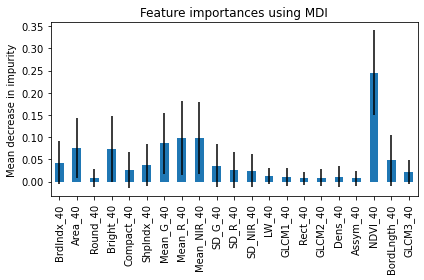

In [156]:
# No Scaled Model (But equal accuracy to scaled)
forest_importances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [157]:
# No Scaled Model (But equal accuracy to scaled)
#Feature importance - FEATURE PERMUTATION
#Feature importance based on feature permutation
#Permutation feature importance overcomes limitations 
# of the impurity-based feature importance: they do not 
# have a bias toward high-cardinality features and can 
# be computed on a left-out test set.
start_time = time.time()
result = permutation_importance(
    clf_best, X_test, Y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=X_train.columns)

Elapsed time to compute the importances: 20.956 seconds


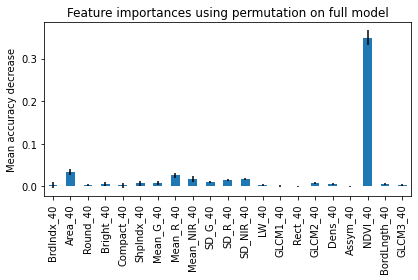

In [158]:
# No Scaled Model (But equal accuracy to scaled)
# The computation for full permutation importance is 
# more costly. Features are shuffled n times and the 
# model refitted to estimate the importance of it
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()
#Although the relative importances vary. As seen on the plots, 
# MDI is less likely than permutation importance to fully omit a feature.

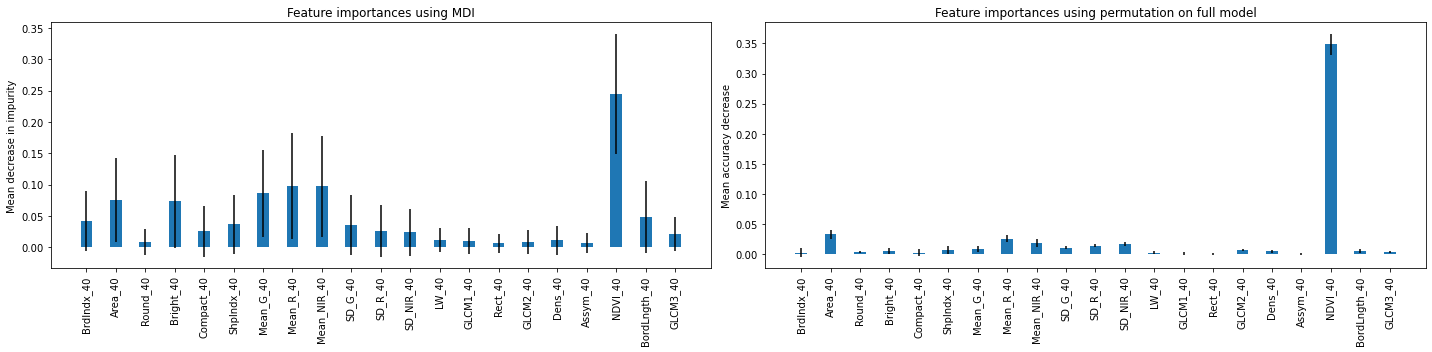

In [159]:
# feature importance
# No Scaled Model (But equal accuracy to scaled)
fig = plt.figure(figsize=(20,5))
plt.subplot(121)
#plt.plot([i for i, e in enumerate(data)], data); plt.xticks([i for i, e in enumerate(labels)], [l for l in labels])
#plt.title("Accuracy Without Scaling",fontsize = 15)
#plt.xlabel('Model',fontsize = 12)
#plt.xticks(rotation = 0)
#plt.ylabel('Accuracy',fontsize = 12)
start_time = time.time()
importances = clf_best.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_best.estimators_], axis=0)
elapsed_time = time.time() - start_time
forest_importances = pd.Series(importances, index=X_train.columns)
#forest_importances.plot.bar(yerr=std, ax=ax)
plt.bar(forest_importances.index, forest_importances.values, width=width, yerr=std)
plt.xticks(rotation = 90)
plt.title("Feature importances using MDI")
plt.ylabel("Mean decrease in impurity")
#fig.tight_layout()

plt.subplot(122)
start_time = time.time()
result = permutation_importance(
    clf_best, X_test, Y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time

forest_importances = pd.Series(result.importances_mean, index=X_train.columns)
#forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
plt.bar(forest_importances.index, forest_importances.values, width=width, yerr=result.importances_std)
plt.xticks(rotation = 90)
plt.title("Feature importances using permutation on full model")
plt.ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [160]:
forest_importances = pd.Series(importances, index=X_train.columns)
forest_importances

BrdIndx_40      0.042001
Area_40         0.075766
Round_40        0.008298
Bright_40       0.073430
Compact_40      0.025438
ShpIndx_40      0.037055
Mean_G_40       0.086108
Mean_R_40       0.097882
Mean_NIR_40     0.097671
SD_G_40         0.035643
SD_R_40         0.026114
SD_NIR_40       0.024279
LW_40           0.011999
GLCM1_40        0.010831
Rect_40         0.006835
GLCM2_40        0.008886
Dens_40         0.011274
Assym_40        0.006814
NDVI_40         0.244751
BordLngth_40    0.048240
GLCM3_40        0.020686
dtype: float64

In [161]:
forest_importances = pd.Series(result.importances_mean, index=X_train.columns)
forest_importances.values

array([0.0025641 , 0.03313609, 0.0035503 , 0.00552268, 0.00236686,
       0.00729783, 0.00828402, 0.0260355 , 0.01814596, 0.01104536,
       0.01459566, 0.017357  , 0.00276134, 0.00118343, 0.00039448,
       0.00710059, 0.00473373, 0.00078895, 0.34871795, 0.00512821,
       0.00394477])

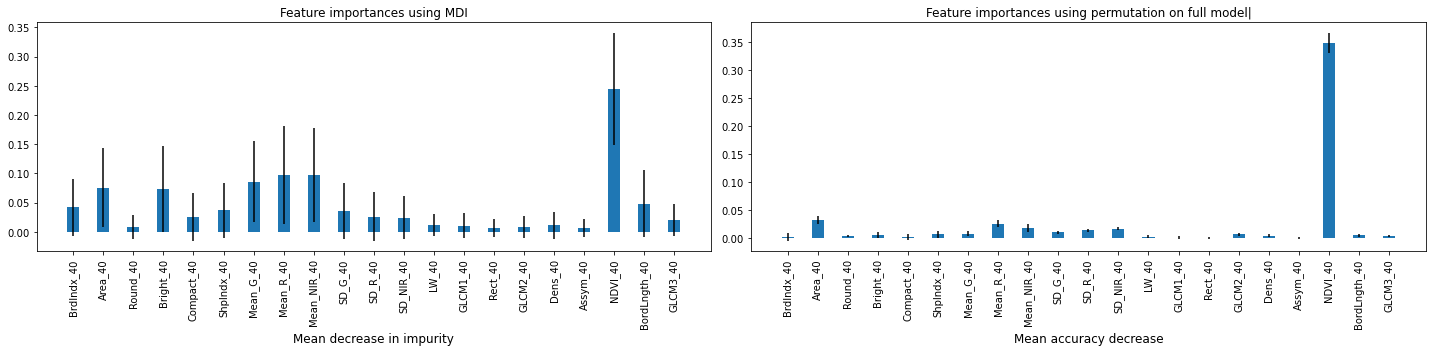

In [162]:
width=0.4
fig = plt.figure(figsize=(20,5))
fig.add_subplot(1, 2, 1)
forest_importances = pd.Series(importances, index=X_train.columns)
plt.bar(forest_importances.index, forest_importances.values, width=width, yerr=std)
plt.xticks(rotation = 90)
plt.xlabel('Mean decrease in impurity',fontsize = 12)
plt.title('Feature importances using MDI',fontsize = 12)
#forest_importances.plot.bar(yerr=std, ax=ax)
fig.add_subplot(1, 2, 2)
forest_importances = pd.Series(result.importances_mean, index=X_train.columns)
plt.bar(forest_importances.index, forest_importances.values, width=width, yerr=result.importances_std)
#forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
plt.xticks(rotation = 90)
plt.xlabel('Mean accuracy decrease',fontsize = 12)
plt.title('Feature importances using permutation on full model|',fontsize = 12)
fig.tight_layout()
plt.show()

C:\Users\500596~1\AppData\Local\Temp\3/ipykernel_14268/3214420580.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(forest_importances.index, rotation=90) #axes[0].get_xticks()
C:\Users\500596~1\AppData\Local\Temp\3/ipykernel_14268/3214420580.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(forest_importances.index, rotation=90) #axes[0].get_xticks()


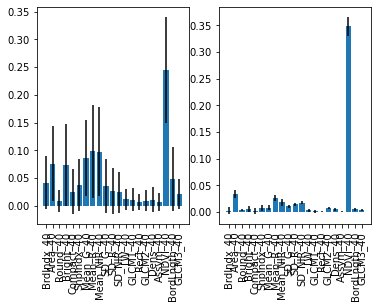

In [163]:
fig, axes = plt.subplots(nrows=1, ncols=2)
forest_importances = pd.Series(importances, index=X_train.columns)
#axes[0].plot(forest_importances.index, forest_importances.values)
axes[0].bar(forest_importances.index, forest_importances.values, yerr=std)
axes[0].set_xticklabels(forest_importances.index, rotation=90) #axes[0].get_xticks()
forest_importances = pd.Series(result.importances_mean, index=X_train.columns)
#axes[1].plot(forest_importances.index, forest_importances.values)
axes[1].bar(forest_importances.index, forest_importances.values, yerr=result.importances_std)
axes[1].set_xticklabels(forest_importances.index, rotation=90) #axes[0].get_xticks()
#fig.tight_layout()
plt.show()

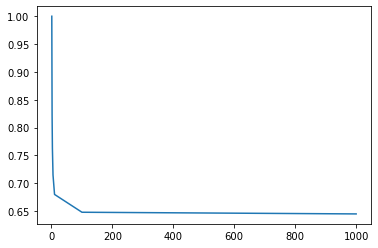

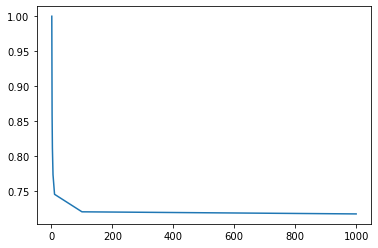

In [164]:
x  = [ 1, 2, 3, 5, 10, 100, 1000 ]
y1 = [ 1, 0.822, 0.763, 0.715, 0.680, 0.648, 0.645 ]
y2 = [ 1, 0.859, 0.812, 0.774, 0.746, 0.721, 0.718 ]

import matplotlib.pyplot as plt
from matplotlib.transforms import BlendedGenericTransform
# mode 01 from one case
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
line1, = ax1.plot( x, y1, label='mode 01' )
# mode 01 from other case
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
line2, = ax2.plot( x, y2, label='mode 01' )


C:\Users\500596~1\AppData\Local\Temp\3/ipykernel_14268/442629387.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig3.show()


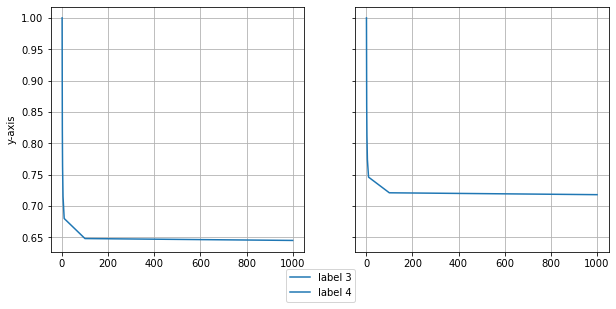

In [165]:

# Create new figure and two subplots, sharing both axes
fig3, (ax3, ax4) = plt.subplots(1,2,sharey=True, sharex=True,figsize=(10,5))

# Plot data from fig1 and fig2
line3, = ax3.plot(line1.get_data()[0], line1.get_data()[1])
line4, = ax4.plot(line2.get_data()[0], line2.get_data()[1])
# If possible (easy access to plotting data) use
# ax3.plot(x, y1)
# ax4.lpot(x, y2)

ax3.set_ylabel('y-axis')
ax3.grid(True)
ax4.grid(True)

# Add legend
fig3.legend((line3, line4),
            ('label 3', 'label 4'),
            loc = 'upper center',
            bbox_to_anchor = [0.5, -0.05],
            bbox_transform = BlendedGenericTransform(fig3.transFigure, ax3.transAxes))
# Make space for the legend beneath the subplots
plt.subplots_adjust(bottom = 0.2)
# Show only fig3
fig3.show()